Application of Random Forest to data created in previous notebook Create_Dataframe_rawMFCCs.ipynb.
The data has 13 MFCCs for each sample to represent the audio.
They were taken at time intervals throughout the audio and then the mean for each was calculated giving one value for each of the 13 MFCCs for each sample. 

The dataset is imbalanced so oversampling is used to create more COVID-19 examples so that there is an equal amount of both.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

folder = '/content/drive/My Drive/Colab Notebooks/COVID-19'
if not os.path.exists(folder):
  print(folder + ' does not exist')

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read in dataframe created previously.

In [ ]:
df_train_mean_MFCCs = pd.read_csv(os.path.join(folder, 'df_train_mean_MFCCs.csv'), index_col=0)
print(df_train_mean_MFCCs.head(10))
print(df_train_mean_MFCCs.shape)

df_test_mean_MFCCs = pd.read_csv(os.path.join(folder, 'df_test_mean_MFCCs.csv'), index_col=0)
print(df_test_mean_MFCCs.head(10))
print(df_test_mean_MFCCs.shape)

   Unnamed: 0.1                                    id   age  gender    status  \
0             0          Zb2Inq1UVhcMnWA41GpKyRdF4z62  66.0  female   healthy   
1             1  c4138919-bd2c-4e24-9fcf-582e428c7d27  37.0  female   healthy   
2             2          ygiPwZYsKFetOejhxWXB6rKSHAf2  66.0    male  COVID-19   
3             3  ec8ddd1e-d555-490f-9719-70a99c1c6993  29.0    male   healthy   
4             4          CFkIEzwZ5PcogCElOD2K3RJQzmh1  44.0    male   healthy   
5             5  68b505f9-1bf6-4a96-be6a-6cebfc73a974   NaN  female   healthy   
6             6  b22dc80a-2eec-4b9f-a69b-7eb5353a08e8  28.0  female   healthy   
7             7  428c81f6-943c-4679-a034-ec004e26d040  50.0    male   healthy   
8             8  17406b1b-fe8e-4325-bbf2-3a0234e65f2b  54.0  female   healthy   
9             9  587204a9-b8d4-4f10-b70c-cbf2db847af1  50.0    male   healthy   

                                          audio_file  \
0  /content/drive/My Drive/Colab Notebooks/coswar...

In [ ]:
#Remove some of the unused columns
df_train_mean_MFCCs.drop("Unnamed: 0.1", axis=1, inplace=True)
df_train_mean_MFCCs.drop("id", axis=1, inplace=True)
df_train_mean_MFCCs.drop("source", axis=1, inplace=True)
df_train_mean_MFCCs.drop("audio_file", axis=1, inplace=True)
df_train_mean_MFCCs.drop("image_file", axis=1, inplace=True)
df_train_mean_MFCCs.drop("cough_detected", axis=1, inplace=True)

df_test_mean_MFCCs.drop("Unnamed: 0.1" , axis=1, inplace=True)
df_test_mean_MFCCs.drop("id", axis=1, inplace=True)
df_test_mean_MFCCs.drop("source", axis=1, inplace=True)
df_test_mean_MFCCs.drop("audio_file", axis=1, inplace=True)
df_test_mean_MFCCs.drop("image_file", axis=1, inplace=True)
df_test_mean_MFCCs.drop("cough_detected", axis=1, inplace=True)

print(df_train_mean_MFCCs.head(10))
print(df_train_mean_MFCCs.shape)
print(df_test_mean_MFCCs.head(10))
print(df_test_mean_MFCCs.shape)

    age  gender    status       MFCC1      MFCC2      MFCC3      MFCC4  \
0  66.0  female   healthy -133.830545  34.083198  -8.187187   3.509574   
1  37.0  female   healthy -170.469691  21.353953  -4.523851   6.020374   
2  66.0    male  COVID-19 -109.534466  40.497336 -20.167722  13.650465   
3  29.0    male   healthy -158.027175  36.867938 -10.393110   5.113646   
4  44.0    male   healthy -117.264283  39.760798  -3.136350  14.893832   
5   NaN  female   healthy -233.581462  34.243792 -14.673870   9.911830   
6  28.0  female   healthy -130.290663  10.840606  -6.478002  -1.872014   
7  50.0    male   healthy -122.970740  29.335970 -22.594054  16.996990   
8  54.0  female   healthy -164.129907  25.920456 -10.507415   7.123511   
9  50.0    male   healthy -131.043576  42.040548 -15.228054   7.777362   

      MFCC5     MFCC6      MFCC7     MFCC8     MFCC9    MFCC10    MFCC11  \
0 -0.777061 -0.555756   1.721365 -5.020207 -3.322323 -1.155100 -1.150911   
1  2.203849 -1.233155   4.174372 

Rename columns as model.save() will not accept capitals in column titles.

In [ ]:
dict = {'MFCC1': 'mfcc1',
        'MFCC2': 'mfcc2',
        'MFCC3': 'mfcc3',
        'MFCC4': 'mfcc4',
        'MFCC5': 'mfcc5',
        'MFCC6': 'mfcc6',
        'MFCC7': 'mfcc7',
        'MFCC8': 'mfcc8',
        'MFCC9': 'mfcc9',
        'MFCC10': 'mfcc10',
        'MFCC11': 'mfcc11',
        'MFCC12': 'mfcc12',
        'MFCC13': 'mfcc13'}
 
df_train_mean_MFCCs.rename(columns=dict,
          inplace=True)

df_test_mean_MFCCs.rename(columns=dict,
          inplace=True)

print(df_train_mean_MFCCs.head(10))
print(df_train_mean_MFCCs.shape)
print(df_test_mean_MFCCs.head(10))
print(df_test_mean_MFCCs.shape)

    age  gender    status       mfcc1      mfcc2      mfcc3      mfcc4  \
0  66.0  female   healthy -133.830545  34.083198  -8.187187   3.509574   
1  37.0  female   healthy -170.469691  21.353953  -4.523851   6.020374   
2  66.0    male  COVID-19 -109.534466  40.497336 -20.167722  13.650465   
3  29.0    male   healthy -158.027175  36.867938 -10.393110   5.113646   
4  44.0    male   healthy -117.264283  39.760798  -3.136350  14.893832   
5   NaN  female   healthy -233.581462  34.243792 -14.673870   9.911830   
6  28.0  female   healthy -130.290663  10.840606  -6.478002  -1.872014   
7  50.0    male   healthy -122.970740  29.335970 -22.594054  16.996990   
8  54.0  female   healthy -164.129907  25.920456 -10.507415   7.123511   
9  50.0    male   healthy -131.043576  42.040548 -15.228054   7.777362   

      mfcc5     mfcc6      mfcc7     mfcc8     mfcc9    mfcc10    mfcc11  \
0 -0.777061 -0.555756   1.721365 -5.020207 -3.322323 -1.155100 -1.150911   
1  2.203849 -1.233155   4.174372 

In [ ]:
# Name of the label column.
label = "status"

classes = df_mean_MFCCs[label].unique().tolist()
print(f"Label classes: {classes}")

Label classes: ['healthy', 'COVID-19']


Oversample COVID-19 samples in training dataset only.

In [ ]:
# Class sizes before oversampling.
class_sizes_before = df_train_mean_MFCCs.groupby('status').status.count()
print(class_sizes_before)

status
COVID-19     1153
healthy     10248
Name: status, dtype: int64


In [ ]:
#Create dataframe of just covid images from df_train_mean_MFCCs
df_covid = df_train_mean_MFCCs.loc[df_train_mean_MFCCs.status =='COVID-19']
print(df_covid.shape)
print(df_covid.head())

(1153, 16)
     age  gender    status       mfcc1      mfcc2      mfcc3      mfcc4  \
2   66.0    male  COVID-19 -109.534466  40.497336 -20.167722  13.650465   
14  15.0    male  COVID-19 -115.545831  56.552756 -25.935144  12.042850   
22  20.0  female  COVID-19 -134.951742  23.520265   1.779338   3.721522   
25   NaN  female  COVID-19 -147.759519  29.028527  -8.398978   3.276590   
37  62.0  female  COVID-19 -142.463728  39.134217  -0.635783   5.472461   

       mfcc5     mfcc6     mfcc7     mfcc8     mfcc9    mfcc10    mfcc11  \
2  -1.570543  5.312078  6.573590 -7.102440  0.006539 -3.277122 -1.139861   
14  4.154395 -5.155831  4.805405 -4.289040 -1.336220  0.119644 -0.374587   
22 -1.944311  4.455704  3.654901 -0.106523 -2.856410 -2.019152  0.261966   
25  4.933697  1.314494  3.456197 -0.775042 -0.334707 -0.036669 -1.631051   
37  2.032627 -1.912693  3.584006  1.315313  0.847811  0.944991 -0.563151   

      mfcc12    mfcc13  
2   2.552691 -0.579591  
14  3.281366 -2.228918  
22 -0.

In [ ]:
# Add copies of all COVID-19 images to dataframe df_train_mean_MFCCs
num_repeats = int((class_sizes_before['healthy']/class_sizes_before['COVID-19'])-1)
for i in range (num_repeats):
  df_train_mean_MFCCs = pd.concat([df_train_mean_MFCCs,df_covid]) 

class_sizes = df_train_mean_MFCCs.groupby('status').status.count()
df_balance = df_covid.iloc[:(class_sizes['healthy']-class_sizes['COVID-19'])]
df_train_mean_MFCCs = pd.concat([df_train_mean_MFCCs,df_balance]) 

df_train_mean_MFCCs = df_train_mean_MFCCs.sample(frac = 1) #shuffle dataframe
print(df_train_mean_MFCCs.shape)
print(df_train_mean_MFCCs.head())

print(df_train_mean_MFCCs.groupby('status').status.count())

(20496, 16)
        age gender    status       mfcc1      mfcc2      mfcc3     mfcc4  \
3277   31.0   male   healthy -335.502628  10.472083  -2.882930  1.771986   
857    15.0   male   healthy -206.494781  12.151900   0.223675  8.051968   
10162  47.0   male   healthy -148.245825  28.450208  -6.889056  4.459840   
8515   31.0   male  COVID-19 -119.269110  44.412302 -12.820088  9.742987   
6841    NaN    NaN  COVID-19 -149.670411  51.616321  -5.505949 -3.756311   

          mfcc5     mfcc6     mfcc7     mfcc8     mfcc9    mfcc10    mfcc11  \
3277   1.049098 -0.639594  1.023370  0.255159  0.025814  0.427421 -0.342817   
857    3.539702  0.529158 -0.104038  4.399883 -0.521076 -0.005909  0.180907   
10162 -1.610255 -2.127831  1.104660 -0.973819 -0.007150 -1.921801 -1.499888   
8515   3.216834 -1.781363  6.421232 -1.629639  0.409440 -0.544657 -2.910049   
6841   7.330962  5.645798 -3.342304  4.424048 -0.544784 -0.806405 -3.433023   

         mfcc12    mfcc13  
3277   0.175122  0.083856  


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import math

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train_mean_MFCCs, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test_mean_MFCCs, label=label)

In [ ]:
#Code to restrict output height
from IPython.core.magic import register_line_magic
from IPython.display import Javascript
from IPython.display import display as ipy_display

# Some of the model training logs can cover the full
# screen if not compressed to a smaller viewport.
# This magic allows setting a max height for a cell.
@register_line_magic
def set_cell_height(size):
  ipy_display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [ ]:
# Identify all columns except labels as features so that they can be included or excluded.
feature_1 = tfdf.keras.FeatureUsage(name="mfcc1")
feature_2 = tfdf.keras.FeatureUsage(name="mfcc2")
feature_3 = tfdf.keras.FeatureUsage(name="mfcc3")
feature_4 = tfdf.keras.FeatureUsage(name="mfcc4")
feature_5 = tfdf.keras.FeatureUsage(name="mfcc5")
feature_6 = tfdf.keras.FeatureUsage(name="mfcc6")
feature_7 = tfdf.keras.FeatureUsage(name="mfcc7")
feature_8 = tfdf.keras.FeatureUsage(name="mfcc8")
feature_9 = tfdf.keras.FeatureUsage(name="mfcc9")
feature_10 = tfdf.keras.FeatureUsage(name="mfcc10")
feature_11 = tfdf.keras.FeatureUsage(name="mfcc11")
feature_12 = tfdf.keras.FeatureUsage(name="mfcc12")
feature_13 = tfdf.keras.FeatureUsage(name="mfcc13")
feature_age = tfdf.keras.FeatureUsage(name="age")
feature_gender = tfdf.keras.FeatureUsage(name="gender")

Choose features to include

In [ ]:
features_to_use = [feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10, feature_11, feature_12, feature_13]

In [ ]:
# The hyper-parameter templates of the Random Forest model.
print(tfdf.keras.RandomForestModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'winner_take_all': True}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


In [ ]:
%set_cell_height 300

# Specify the model.
model = tfdf.keras.RandomForestModel(features=features_to_use, exclude_non_specified_features=True, hyperparameter_template="benchmark_rank1")

#Compile the model
TP = tf.keras.metrics.TruePositives(name = "TP") 
FP = tf.keras.metrics.FalsePositives(name = "FP")
FN = tf.keras.metrics.FalseNegatives(name = "FN")
TN = tf.keras.metrics.TrueNegatives(name = "TN")
auc = tf.keras.metrics.AUC(name = "auc")

METRICS = [TP, FP, FN, TN, auc]

model.compile(metrics=METRICS)

# Train the model.
model.fit(x=train_ds)

<IPython.core.display.Javascript object>

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpnoku2eg5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.449107. Found 20496 examples.
Training model...
Model trained in 0:01:06.669188
Compiling model...
Model compiled.


In [ ]:
#Evaluate the model
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

print(f"NPV: {(evaluation['TN']/(evaluation['TN']+evaluation['FN']+0.00001)):.4f}") #The 0.00001 is to make sure the denominator is never zero.
print(f"Specificity: {(evaluation['TN']/(evaluation['TN']+evaluation['FP']+0.00001)):.4f}")
print(f"Recall: {(evaluation['TP']/(evaluation['TP']+evaluation['FN']+0.00001)):.4f}")

1/1 [==============================] - 1s 754ms/step - loss: 0.0000e+00 - TP: 774.0000 - FP: 87.0000 - FN: 112.0000 - TN: 27.0000 - auc: 0.6376

loss: 0.0000
TP: 774.0000
FP: 87.0000
FN: 112.0000
TN: 27.0000
auc: 0.6376
NPV: 0.1942
Specificity: 0.2368
Recall: 0.8736


In [ ]:
model_folder = '/content/drive/My Drive/Colab Notebooks/models/'
model.save(os.path.join(model_folder, "model_RF_Base"))

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model_RF_Base/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model_RF_Base/assets


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [ ]:
%set_cell_height 300
model.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (13):
	mfcc1
	mfcc10
	mfcc11
	mfcc12
	mfcc13
	mfcc2
	mfcc3
	mfcc4
	mfcc5
	mfcc6
	mfcc7
	mfcc8
	mfcc9

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "__LABEL" 11.932453 ################
    2.   "mfcc9" 10.308411 ############
    3.   "mfcc7" 10.057663 ############
    4.   "mfcc6"  9.982578 ############
    5.   "mfcc4"  9.594042 ###########
    6.   "mfcc8"  8.632964 #########
    7.   "mfcc3"  8.629356 #########
    8.  "mfcc12"  8.173413 ########
    9.   "mfcc5"  7.488712 #######
   10.  "mfcc11"  6.747640 #####
   11.  "mfcc10"  5.398462 ##
   12.   "mfcc2"  4.729491 #
   13.   "mfcc1"  4.102804 
   14.  "mfcc13"

In [ ]:
%set_cell_height 150
model.make_inspector().training_logs()

<IPython.core.display.Javascript object>

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=7568, accuracy=0.7895084566596194, loss=7.5868838488677595, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=20347, accuracy=0.8273947019216592, loss=1.3679919160029903, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=20496, accuracy=0.8633879781420765, loss=0.45763410566735263, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=20496, accuracy=0.8890027322404371, loss=0.3359550729411771, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=20496, accuracy=0.8995413739266198, loss=0.31672110029926653, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=20496, accuracy=0.9050058548009368, loss=0.3110390860917

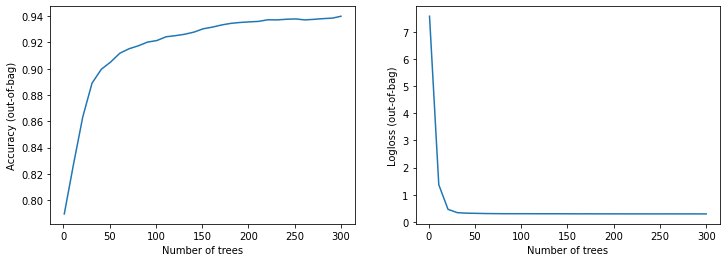

In [ ]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()